# <div style="text-align:center">프로그래밍III 팀플 발표 👩🏻‍💻🧑🏻‍💻👨🏻‍💻 <br/><2020 코로나 확산으로 인한 부동산 이슈></div>
    
<div style="text-align: left"> <b>4조</b></div>
<div style="text-align: left"> <b>· 201804248 정진우</b></div>
<div style="text-align: left"> <b>· 201804238 이희구</b></div>
<div style="text-align: left"> <b>· 202004224 이서영</b></div>

---

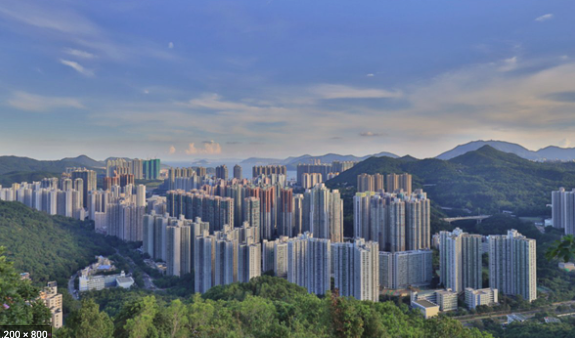

# 1. 데이터 선정


### 🏙 한국 아파트 거래 데이터 
##### 한국의 실제 아파트 거래 데이터


---
## 분석 주제
##### 지지난 해 2020년도 3월 코로나 19의 확산으로 경기침체로 인한 아파트 수요와 아파트 공급이 원활히 이루어 지지 않아 국내 아파트 거래량과 거래 가격이 떨어졌을거라고 예상한다.
##### 그래서 한국의 아파트 거래 데이터를 활용해 년도별 지역별 부동산 거래량과 주택 가격 변동 추이를 파악하고 시각화를 통한 인사이트를 도출한다.

-  코로나 19 확산으로 인한 주택거래량 변화 (3월 일반가구)
    
-  코로나 19확산으로 인한 주택가격 변화 (3월 일반가구)

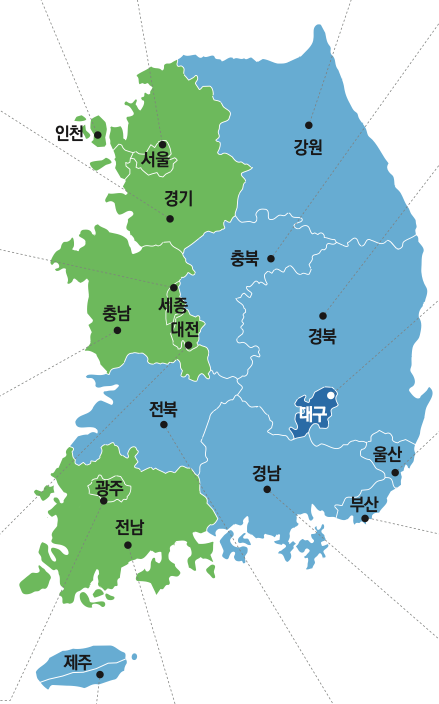

- 서울 / 경기 / 충북 / 대구 / 인천 지역별 비교
---
    
## 데이터 설명
- 지역코드 / 법정동 / 거래일 / 아파트 / 지번 / 전용면적 / 층 / 건측년도 / 거래금액 (단위 : 만원)

# 2. 데이터 전처리

### <한국 아파트 거래 데이터 불러오기>
- 데이터에 포함되어있는 Noise, Outlier, Null을 파악하고 제거해준다.
- '한국 아파트 거래 데이터'의 데이터 세트를 확인해 보았다.
- Na 값은 없었으며 데이터 분석에 방해되는 요소들을 제거해주었다.
- 데이터의 용량이 너무 커 데이터의 형태를 변환하여 데이터의 용량을 줄여주었다.

In [320]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
# 한국 아파트 거래 데이터 불러오기
apart = pd.read_csv('Apart_Deal.csv')
apart

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...,...
999994,41465,성복동,8/15/2018 0:00,성동마을엘지빌리지2차,90,134.3870,12,2001,70000
999995,41465,성복동,8/15/2018 0:00,벽산첼시빌2차,723,133.1480,1,2002,40500
999996,41465,성복동,8/15/2018 0:00,엘지빌리지6,731,134.7250,10,2003,53800
999997,41465,성복동,8/15/2018 0:00,성동마을엘지빌리지2차,90,134.3870,17,2001,68000


In [322]:
# rename() 함수를 통해 컬럼명을 수정해준다.
apart = apart.rename({'지역코드':'Area_code', 
                      '법정동':'Dong',
                      '아파트':'Apartment',
                      '거래일':'Trading_day',
                      '지번':'Lot_number', 
                      '전용면적':'Exclusive_area', 
                      '층':'Floor', 
                      '건축년도':'Year_of_construction', 
                      '거래금액':'Transaction_amount'}, axis='columns')

In [323]:
# 데이터의 컬럼명들을 나열해 확인한다.
columns=apart.columns
columns

Index(['Area_code', 'Dong', 'Trading_day', 'Apartment', 'Lot_number',
       'Exclusive_area', 'Floor', 'Year_of_construction',
       'Transaction_amount'],
      dtype='object')

In [324]:
# 분석에 필요없는 컬럼을 삭제시킨다.
# Area_code : 지역코드, Lot_number : 지번

Apart = apart.drop(["Area_code","Lot_number"], axis=1)
Apart

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount
0,학성동,5/30/2020 0:00,남운학성타운,135.5800,8,1991,26700
1,남외동,1/3/2020 0:00,남외푸르지오1차,101.6000,2,2006,35500
2,남외동,1/3/2020 0:00,에일린의뜰,84.9920,11,2007,36500
3,남외동,1/3/2020 0:00,남외푸르지오1차,118.7060,8,2006,43000
4,남외동,1/4/2020 0:00,남외푸르지오2차,84.9636,7,2007,38700
...,...,...,...,...,...,...,...
999994,성복동,8/15/2018 0:00,성동마을엘지빌리지2차,134.3870,12,2001,70000
999995,성복동,8/15/2018 0:00,벽산첼시빌2차,133.1480,1,2002,40500
999996,성복동,8/15/2018 0:00,엘지빌리지6,134.7250,10,2003,53800
999997,성복동,8/15/2018 0:00,성동마을엘지빌리지2차,134.3870,17,2001,68000


In [325]:
# 한국 아파트 거래 데이터의 정보를 info() 함수를 통해 확인한다.
Apart.info()

# object, float, int 형식 확인
# 53.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Dong                  999999 non-null  object 
 1   Trading_day           999999 non-null  object 
 2   Apartment             999999 non-null  object 
 3   Exclusive_area        999999 non-null  float64
 4   Floor                 999999 non-null  int64  
 5   Year_of_construction  999999 non-null  int64  
 6   Transaction_amount    999999 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 53.4+ MB


In [326]:
# 한국 아파트 거래 데이터의 메모리 사용량을 확인한다.
Apart.memory_usage(deep = True)

Index                        128
Dong                    89078534
Trading_day             70886364
Apartment               96127238
Exclusive_area           7999992
Floor                    7999992
Year_of_construction     7999992
Transaction_amount       7999992
dtype: int64

In [327]:
# 메모리 사용량을 줄이기 위해 데이터 형태를 변형해준다.
Apart = Apart.astype({'Dong':'category',
                  'Apartment':'category',
                  'Exclusive_area':'float32',
                  'Floor':'int32',
                  'Year_of_construction':'int32',
                  'Transaction_amount':'int32'
                  })
Apart.dtypes

Dong                    category
Trading_day               object
Apartment               category
Exclusive_area           float32
Floor                      int32
Year_of_construction       int32
Transaction_amount         int32
dtype: object

In [328]:
# 데이터 형태를 변형 해준 후 메모리 사용량을 확인한다.
Apart.memory_usage(deep = True)

# 89078534 -> 2392417
# 7999992 -> 3999996

Index                        128
Dong                     2392417
Trading_day             70886364
Apartment                6063103
Exclusive_area           3999996
Floor                    3999996
Year_of_construction     3999996
Transaction_amount       3999996
dtype: int64

In [329]:
# 데이터 형변환 후 info() 함수를 통해 Dtype을 확인한다.
Apart.info()


# 53.4+ MB -> 28.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Dong                  999999 non-null  category
 1   Trading_day           999999 non-null  object  
 2   Apartment             999999 non-null  category
 3   Exclusive_area        999999 non-null  float32 
 4   Floor                 999999 non-null  int32   
 5   Year_of_construction  999999 non-null  int32   
 6   Transaction_amount    999999 non-null  int32   
dtypes: category(2), float32(1), int32(3), object(1)
memory usage: 28.0+ MB


In [330]:
# 한국 아파트 거래 데이터에 na값의 존재 여부를 확인한다.
Apart.isna().sum()

Dong                    0
Trading_day             0
Apartment               0
Exclusive_area          0
Floor                   0
Year_of_construction    0
Transaction_amount      0
dtype: int64

# 3. 데이터 분석
## 🔍데이터 확인
- 데이터 전처리를 통해 정제된 데이터를 보고 이를 다양한 각도에서 관찰하고 이해를 우선으로 할 것이다.
#### ✔️ 서울 용산

In [331]:
# 서울 용산동 2018년 ~ 2020년 집값 데이터
Dong1_df = Apart[Apart['Dong'].str.contains('용산동')]
Dong1_df    

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount
235822,용산동,1/3/2020 0:00,용산주공2차,59.709999,10,1999,8300
235823,용산동,1/4/2020 0:00,용산주공1차,46.029999,2,1981,5000
235824,용산동,1/6/2020 0:00,신원10차,59.389999,2,1992,7800
235825,용산동,1/6/2020 0:00,용산주공2차,49.770000,6,1999,7500
235826,용산동,1/6/2020 0:00,용산주공1차,35.619999,1,1981,4150
...,...,...,...,...,...,...,...
866918,용산동,12/18/2018 0:00,우림필유2차,144.982101,1,2008,42500
866919,용산동,12/21/2018 0:00,경남아너스빌1단지,132.352005,4,2008,48700
866920,용산동,12/27/2018 0:00,우림루미아트,101.913696,10,2007,37900
866921,용산동,12/28/2018 0:00,우림루미아트,84.658997,7,2007,33000


In [332]:
# 서울 데이터를 Datetime 형식으로 변환
pd.to_datetime(Dong1_df['Trading_day']) 

235822   2020-01-03
235823   2020-01-04
235824   2020-01-06
235825   2020-01-06
235826   2020-01-06
            ...    
866918   2018-12-18
866919   2018-12-21
866920   2018-12-27
866921   2018-12-28
866922   2018-12-29
Name: Trading_day, Length: 2297, dtype: datetime64[ns]

In [ ]:
# 서울 데이터를 Datetime 형식으로 변환한 것을 넣어주기
Dong1_df['Trading_day'] = pd.to_datetime(Dong1_df['Trading_day']) 

In [ ]:
# 서울 Trading_day 데이터를 년, 월, 일 로 나눠줍니다.
Dong1_df['year'] = Dong1_df['Trading_day'].dt.year
Dong1_df['month'] = Dong1_df['Trading_day'].dt.month
Dong1_df['day'] = Dong1_df['Trading_day'].dt.day

In [335]:
# 서울 데이터
Dong1_df 

#year, month, day 컬럼이 생기면서 추출 완료

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount,year,month,day
235822,용산동,2020-01-03,용산주공2차,59.709999,10,1999,8300,2020,1,3
235823,용산동,2020-01-04,용산주공1차,46.029999,2,1981,5000,2020,1,4
235824,용산동,2020-01-06,신원10차,59.389999,2,1992,7800,2020,1,6
235825,용산동,2020-01-06,용산주공2차,49.770000,6,1999,7500,2020,1,6
235826,용산동,2020-01-06,용산주공1차,35.619999,1,1981,4150,2020,1,6
...,...,...,...,...,...,...,...,...,...,...
866918,용산동,2018-12-18,우림필유2차,144.982101,1,2008,42500,2018,12,18
866919,용산동,2018-12-21,경남아너스빌1단지,132.352005,4,2008,48700,2018,12,21
866920,용산동,2018-12-27,우림루미아트,101.913696,10,2007,37900,2018,12,27
866921,용산동,2018-12-28,우림루미아트,84.658997,7,2007,33000,2018,12,28


In [337]:
# groupby() 함수를 사용해서 거래가격 평균을 년도, 월 별로 비교해보았습니다.
df_01 = Dong1_df.groupby(['year','month','Dong'], observed=True)['Transaction_amount'].agg(['mean']).round(2)
df_01   


# 23593.94 -> 9195.24 -> 7858.82

mean
year month Dong            
2018 1     용산동     24186.70
           용산동2가   43500.00
           용산동5가  165450.00
     2     용산동     22539.37
           용산동2가   60000.00
           용산동5가  167166.67
     3     용산동     23593.94
           용산동5가  226687.50
     4     용산동     23942.86
           용산동5가  205000.00
     5     용산동     23264.40
           용산동5가  199625.00
     6     용산동     23469.90
           용산동5가  185500.00
     7     용산동     22671.30
           용산동5가  227357.14
     8     용산동     23632.11
           용산동2가   52000.00
           용산동5가  213333.33
     9     용산동     23353.41
           용산동2가   45000.00
           용산동5가  200000.00
     10    용산동     25946.12
           용산동5가  288000.00
     11    용산동     26810.00
           용산동5가  280000.00
     12    용산동     25732.94
2019 1     용산동     10520.59
     2     용산동      6821.88
     3     용산동      9195.24
     4     용산동      9936.67
     5     용산동      7306.80
     6     용산동      8555.00
     7     용산동      8337.14
     8     용산동     10814.06
     9     용산동     10084.86
     10    용산동      9367.38
     11    용산동     10204.84
     12    용산동     10747.65
2020 1     용산동     10893.00
     2     용산동     10154.11
     3     용산동      7858.82
     4     용산동      8019.63
     5     용산동     11103.88
     6     용산동     12916.67
     7     용산동     11719.34
     8     용산동     16694.83
     9     용산동     12792.59
     10    용산동      7745.56

In [339]:
# 서울 용산동 2018년 3월 거래량
Dong1_df[(Dong1_df['Dong'] == '용산동')&(Dong1_df['year']<= 2018)&(Dong1_df['month'] == 3)].count()

Dong                    175
Trading_day             175
Apartment               175
Exclusive_area          175
Floor                   175
Year_of_construction    175
Transaction_amount      175
year                    175
month                   175
day                     175
dtype: int64

In [340]:
# 서울 용산동 2019년 3월 거래량
Dong1_df[(Dong1_df['Dong'] == '용산동')&(Dong1_df['year']<= 2019)&(Dong1_df['month'] == 3)].count()

Dong                    196
Trading_day             196
Apartment               196
Exclusive_area          196
Floor                   196
Year_of_construction    196
Transaction_amount      196
year                    196
month                   196
day                     196
dtype: int64

In [341]:
# 서울 용산동 2020년 3월 거래량
Dong1_df[(Dong1_df['Dong'] == '용산동')&(Dong1_df['year']<= 2020)&(Dong1_df['month'] == 3)].count()

Dong                    247
Trading_day             247
Apartment               247
Exclusive_area          247
Floor                   247
Year_of_construction    247
Transaction_amount      247
year                    247
month                   247
day                     247
dtype: int64

## 🔍데이터 확인
#### ✔️ 경기도 수원 

In [342]:
# 경기도 수원 2018년 ~ 2020년 집값 데이터
Dong2_df = Apart[Apart['Dong'].str.contains('세류동')]
Dong2_df

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount
25738,세류동,1/1/2020 0:00,한주,84.830002,5,1995,23200
25739,세류동,1/1/2020 0:00,수원센트럴타운3단지,84.980003,15,2015,53500
25740,세류동,1/1/2020 0:00,수원권선데시앙,84.938904,8,2009,32500
25741,세류동,1/2/2020 0:00,삼익,59.639999,3,1999,21700
25742,세류동,1/2/2020 0:00,수원센트럴타운2단지,59.880001,6,2015,49000
...,...,...,...,...,...,...,...
888007,세류동,12/22/2018 0:00,녹턴,84.120003,10,2006,27800
888008,세류동,12/22/2018 0:00,수원센트럴타운2단지,59.980000,13,2015,41200
888009,세류동,12/27/2018 0:00,수원센트럴타운1단지,84.980003,8,2015,47300
888010,세류동,12/29/2018 0:00,수원센트럴타운1단지,84.980003,1,2015,43500


In [343]:
# 서울 데이터를 Datetime 형식으로 변환
pd.to_datetime(Dong2_df['Trading_day'])

25738    2020-01-01
25739    2020-01-01
25740    2020-01-01
25741    2020-01-02
25742    2020-01-02
            ...    
888007   2018-12-22
888008   2018-12-22
888009   2018-12-27
888010   2018-12-29
888011   2018-12-29
Name: Trading_day, Length: 953, dtype: datetime64[ns]

In [ ]:
# 데이터를 넣어줍니다.
Dong2_df['Trading_day'] = pd.to_datetime(Dong2_df['Trading_day'])

In [ ]:
# 경기도 수원 Trading_day 데이터를 년, 월, 일 로 나눠줍니다.
Dong2_df['year'] = Dong2_df['Trading_day'].dt.year
Dong2_df['month'] = Dong2_df['Trading_day'].dt.month
Dong2_df['day'] = Dong2_df['Trading_day'].dt.day

In [346]:
# 경기도 수원
df_02 = Dong2_df.groupby(['year','month','Dong'], observed=True)['Transaction_amount'].agg(['mean']).round(2)
df_02

# 33281.18 -> 30266.92 -> 26494.44

mean
year month Dong          
2018 1     세류동   30875.00
     2     세류동   33643.48
     3     세류동   33281.18
     4     세류동   33118.97
     5     세류동   35254.17
     6     세류동   32886.49
     7     세류동   35506.45
     8     세류동   38959.23
     9     세류동   40575.86
     10    세류동   32037.93
     11    세류동   32110.53
     12    세류동   35369.44
2019 1     세류동   34972.00
     2     세류동   35150.00
     3     세류동   30266.92
     4     세류동   37012.50
     5     세류동   37681.25
     6     세류동   35237.50
     7     세류동   31261.90
     8     세류동   38550.00
     9     세류동   35890.38
     10    세류동   39249.25
     11    세류동   41657.01
     12    세류동   39708.06
2020 1     세류동   37515.00
     2     세류동   42860.98
     3     세류동   26494.44
     4     세류동   31109.09
     5     세류동   40603.33
     6     세류동   39943.90
     7     세류동   45919.23
     8     세류동   42316.67
     9     세류동   42775.00
     10    세류동   23500.00

In [348]:
# 경기도 수원 2018년 3월 거래량
Dong2_df[(Dong2_df['Dong'] == '세류동')&(Dong2_df['year']<= 2018)&(Dong2_df['month'] == 3)].count()

Dong                    51
Trading_day             51
Apartment               51
Exclusive_area          51
Floor                   51
Year_of_construction    51
Transaction_amount      51
year                    51
month                   51
day                     51
dtype: int64

In [349]:
# 경기도 수원 2019년 3월 거래량
Dong2_df[(Dong2_df['Dong'] == '세류동')&(Dong2_df['year']<= 2019)&(Dong2_df['month'] == 3)].count()

Dong                    64
Trading_day             64
Apartment               64
Exclusive_area          64
Floor                   64
Year_of_construction    64
Transaction_amount      64
year                    64
month                   64
day                     64
dtype: int64

In [350]:
# 경기도 수원 2020년 3월 거래량
Dong2_df[(Dong2_df['Dong'] == '세류동')&(Dong2_df['year']<= 2020)&(Dong2_df['month'] == 3)].count()

Dong                    73
Trading_day             73
Apartment               73
Exclusive_area          73
Floor                   73
Year_of_construction    73
Transaction_amount      73
year                    73
month                   73
day                     73
dtype: int64

## 🔍데이터 확인
### ✔️ 충청북도 청주

In [351]:
# 충청북도 청주 2018년 ~ 2020년 집값 데이터
Dong3_df = Apart[Apart['Dong'].str.contains('봉명동')]
Dong3_df

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount
228453,봉명동,1/1/2020 0:00,삼정백조,59.950001,3,1993,11900
228454,봉명동,1/2/2020 0:00,삼정백조,84.570000,9,1993,14500
228455,봉명동,1/2/2020 0:00,봉명아이파크,84.889397,5,2005,22500
228456,봉명동,1/2/2020 0:00,두진하트리움,84.809998,8,2003,16800
228457,봉명동,1/2/2020 0:00,초원,49.880001,4,1992,9000
...,...,...,...,...,...,...,...
866839,봉명동,12/28/2018 0:00,미성샤르망,68.306999,13,2006,15750
866840,봉명동,12/28/2018 0:00,리베라 아이누리2,19.803900,13,2013,6500
866841,봉명동,12/29/2018 0:00,도안6단지 센트럴시티,84.879997,4,2010,42000
866842,봉명동,12/29/2018 0:00,드리미아,19.193001,15,2012,6800


In [352]:
# 충청북도 청주
pd.to_datetime(Dong3_df['Trading_day'])

228453   2020-01-01
228454   2020-01-02
228455   2020-01-02
228456   2020-01-02
228457   2020-01-02
            ...    
866839   2018-12-28
866840   2018-12-28
866841   2018-12-29
866842   2018-12-29
866843   2018-12-31
Name: Trading_day, Length: 1806, dtype: datetime64[ns]

In [ ]:
# 충청북도 청주
Dong3_df['Trading_day'] = pd.to_datetime(Dong3_df['Trading_day'])

In [ ]:
# 충청북도 청주
Dong3_df['year'] = Dong3_df['Trading_day'].dt.year
Dong3_df['month'] = Dong3_df['Trading_day'].dt.month
Dong3_df['day'] = Dong3_df['Trading_day'].dt.day

In [356]:
# 충청북도 청주
df_03 = Dong3_df.groupby(['year','month','Dong'], observed=True)['Transaction_amount'].agg(['mean']).round(2)
df_03

# 28706.27 -> 12207.32 -> 13876.67

mean
year month Dong          
2018 1     봉명동   27613.58
     2     봉명동   27857.96
     3     봉명동   28706.27
     4     봉명동   31295.12
     5     봉명동   28763.60
     6     봉명동   20659.06
     7     봉명동   27576.43
     8     봉명동   34157.89
     9     봉명동   35222.83
     10    봉명동   34141.54
     11    봉명동   27256.76
     12    봉명동   21844.24
2019 1     봉명동   13709.13
     2     봉명동   12319.64
     3     봉명동   12207.32
     4     봉명동   15672.78
     5     봉명동   15484.34
     6     봉명동   19161.54
     7     봉명동   14037.16
     8     봉명동   13334.91
     9     봉명동   12207.95
     10    봉명동   13593.18
     11    봉명동   12561.45
     12    봉명동   13929.33
2020 1     봉명동   16173.12
     2     봉명동   15481.83
     3     봉명동   13876.67
     4     봉명동   15015.25
     5     봉명동   15684.45
     6     봉명동   19571.29
     7     봉명동   17681.16
     8     봉명동   17262.88
     9     봉명동   14122.00
     10    봉명동   17953.12

In [358]:
# 충청북도 청주 2018년 3월 거래량
Dong3_df[(Dong3_df['Dong'] == '봉명동')&(Dong3_df['year']<= 2018)&(Dong3_df['month'] == 3)].count()

Dong                    59
Trading_day             59
Apartment               59
Exclusive_area          59
Floor                   59
Year_of_construction    59
Transaction_amount      59
year                    59
month                   59
day                     59
dtype: int64

In [359]:
# 충청북도 청주 2019년 3월 거래량
Dong3_df[(Dong3_df['Dong'] == '봉명동')&(Dong3_df['year']<= 2019)&(Dong3_df['month'] == 3)].count()

Dong                    100
Trading_day             100
Apartment               100
Exclusive_area          100
Floor                   100
Year_of_construction    100
Transaction_amount      100
year                    100
month                   100
day                     100
dtype: int64

In [360]:
# 충청북도 청주 2020년 3월 거래량
Dong3_df[(Dong3_df['Dong'] == '봉명동')&(Dong3_df['year']<= 2020)&(Dong3_df['month'] == 3)].count()

Dong                    160
Trading_day             160
Apartment               160
Exclusive_area          160
Floor                   160
Year_of_construction    160
Transaction_amount      160
year                    160
month                   160
day                     160
dtype: int64

## 🔍데이터 확인
#### ✔️대구 

In [361]:
# 대구 대명동 2018년 ~ 2020년 집값 데이터
Dong4_df = Apart[Apart['Dong'].str.contains('대명동')]
Dong4_df

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount
279432,대명동,1/3/2020 0:00,현대메트로타워,76.264801,30,2011,12000
279433,대명동,1/3/2020 0:00,현대메트로타워,76.264801,26,2011,12700
279434,대명동,1/9/2020 0:00,현대메트로타워,76.264801,25,2011,13250
279435,대명동,1/17/2020 0:00,현대메트로타워,76.264801,6,2011,13400
279725,대명동,2/10/2020 0:00,현대메트로타워,76.264801,32,2011,13700
...,...,...,...,...,...,...,...
769609,대명동,12/21/2018 0:00,보성청록타운,84.989998,12,1998,23500
769610,대명동,12/24/2018 0:00,세종아파트,55.470001,4,1980,14800
769611,대명동,12/24/2018 0:00,동신점보,63.349998,2,1979,14500
769612,대명동,12/27/2018 0:00,개나리맨션,59.799999,10,1980,17350


In [362]:
# 대구 데이터
pd.to_datetime(Dong4_df['Trading_day'])

279432   2020-01-03
279433   2020-01-03
279434   2020-01-09
279435   2020-01-17
279725   2020-02-10
            ...    
769609   2018-12-21
769610   2018-12-24
769611   2018-12-24
769612   2018-12-27
769613   2018-12-29
Name: Trading_day, Length: 435, dtype: datetime64[ns]

In [ ]:
# 대구 데이터
Dong4_df['Trading_day'] = pd.to_datetime(Dong4_df['Trading_day'])

In [ ]:
# 대구 데이터
Dong4_df['year'] = Dong4_df['Trading_day'].dt.year
Dong4_df['month'] = Dong4_df['Trading_day'].dt.month
Dong4_df['day'] = Dong4_df['Trading_day'].dt.day

In [366]:
# 대구 데이터
df_04 = Dong4_df.groupby(['year','month','Dong'], observed=True)['Transaction_amount'].agg(['mean']).round(2)
df_04


# 17880.83 -> 14850.00 -> 14378.57

mean
year month Dong          
2018 1     대명동   19010.87
     2     대명동   17194.64
     3     대명동   17880.83
     4     대명동   18186.84
     5     대명동   18658.91
     6     대명동   17383.33
     7     대명동   17851.85
     8     대명동   17538.89
     9     대명동   17822.86
     10    대명동   18155.88
     11    대명동   18535.71
     12    대명동   17428.26
2019 1     대명동   14750.00
     2     대명동   12000.00
     3     대명동   14850.00
     4     대명동   13166.67
     5     대명동   15875.00
     6     대명동   14400.00
     7     대명동   14841.67
     8     대명동   15333.33
     9     대명동   14350.00
     10    대명동   13650.00
     11    대명동   13960.00
     12    대명동   14822.73
2020 1     대명동   12837.50
     2     대명동   14625.00
     3     대명동   14378.57
     4     대명동   15850.00
     5     대명동   14642.86
     6     대명동   15000.00
     7     대명동   17087.50
     8     대명동   14230.00
     9     대명동   18042.86
     10    대명동   14300.00

In [368]:
# 대구 2018년 3월 거래량
Dong4_df[(Dong4_df['Dong'] == '대명동')&(Dong4_df['year']<= 2018)&(Dong4_df['month'] == 3)].count()

Dong                    24
Trading_day             24
Apartment               24
Exclusive_area          24
Floor                   24
Year_of_construction    24
Transaction_amount      24
year                    24
month                   24
day                     24
dtype: int64

In [369]:
# 대구 2019년 3월 거래량
Dong4_df[(Dong4_df['Dong'] == '대명동')&(Dong4_df['year']<= 2019)&(Dong4_df['month'] == 3)].count()

Dong                    26
Trading_day             26
Apartment               26
Exclusive_area          26
Floor                   26
Year_of_construction    26
Transaction_amount      26
year                    26
month                   26
day                     26
dtype: int64

In [370]:
# 대구 2020년 3월 거래량
Dong4_df[(Dong4_df['Dong'] == '대명동')&(Dong4_df['year']<= 2020)&(Dong4_df['month'] == 3)].count()

Dong                    33
Trading_day             33
Apartment               33
Exclusive_area          33
Floor                   33
Year_of_construction    33
Transaction_amount      33
year                    33
month                   33
day                     33
dtype: int64

## 🔍데이터 확인
#### ✔️인천 연수구 

In [371]:
# 인천 연수구 2018년 ~ 2020년 집값 데이터
Dong5_df = Apart[Apart['Dong'].str.contains('송도동')]
Dong5_df

,Dong,Trading_day,Apartment,Exclusive_area,Floor,Year_of_construction,Transaction_amount
305285,송도동,2/4/2020 0:00,명성송도타운1차,53.139999,1,1988,6000
305286,송도동,2/4/2020 0:00,경림빌라,54.360001,4,1987,5250
305287,송도동,2/25/2020 0:00,유니파크101,71.370003,3,2016,14300
305520,송도동,3/4/2020 0:00,태왕아너스오션,125.344498,5,2006,22000
305521,송도동,3/20/2020 0:00,명성송도타운1차,59.830002,1,1988,7000
...,...,...,...,...,...,...,...
802684,송도동,12/31/2018 0:00,롯데캐슬 캠퍼스타운,101.305603,18,2016,59000
802685,송도동,12/31/2018 0:00,송도풍림아이원1단지,84.716698,12,2005,37200
802686,송도동,12/31/2018 0:00,송도더샵하버뷰(D13),101.132004,7,2011,55000
802687,송도동,12/31/2018 0:00,더샵그린워크1차,59.920101,4,2014,40000


In [ ]:
# 인천 연수구 데이터
Dong5_df['Trading_day'] = pd.to_datetime(Dong5_df['Trading_day'])

In [ ]:
# 인천 연수구 데이터
Dong5_df['year'] = Dong5_df['Trading_day'].dt.year
Dong5_df['month'] = Dong5_df['Trading_day'].dt.month
Dong5_df['day'] = Dong5_df['Trading_day'].dt.day

In [376]:
# 인천 인천 연수구 데이터
df_05 = Dong5_df.groupby(['year','month','Dong'], observed=True)['Transaction_amount'].agg(['mean']).round(2)
df_05

mean
year month Dong          
2018 1     송도동   57471.97
     2     송도동   54773.91
     3     송도동   56484.42
     4     송도동   56792.21
     5     송도동   55032.57
     6     송도동   57700.00
     7     송도동   54922.28
     8     송도동   55916.83
     9     송도동   53722.62
     10    송도동   56195.77
     11    송도동   58020.22
     12    송도동   51292.77
2019 1     송도동   20750.00
     2     송도동    9475.00
     3     송도동   19166.67
     4     송도동   15260.00
     5     송도동    9766.67
     6     송도동   13960.00
     7     송도동   13833.33
     8     송도동   12071.43
     9     송도동   20500.00
     10    송도동   14757.14
     11    송도동   19000.00
2020 2     송도동    8516.67
     3     송도동    9500.00
     4     송도동   10512.50
     5     송도동    8010.00
     6     송도동   14220.00
     7     송도동   14425.00
     8     송도동   12466.67
     9     송도동   17080.00

In [378]:
# 인천 2018년 3월 거래량
Dong5_df[(Dong5_df['Dong'] == '송도동')&(Dong5_df['year']<= 2018)&(Dong5_df['month'] == 3)].count()

Dong                    189
Trading_day             189
Apartment               189
Exclusive_area          189
Floor                   189
Year_of_construction    189
Transaction_amount      189
year                    189
month                   189
day                     189
dtype: int64

In [379]:
# 인천 2019년 3월 거래량
Dong5_df[(Dong5_df['Dong'] == '송도동')&(Dong5_df['year']<= 2019)&(Dong5_df['month'] == 3)].count()

Dong                    192
Trading_day             192
Apartment               192
Exclusive_area          192
Floor                   192
Year_of_construction    192
Transaction_amount      192
year                    192
month                   192
day                     192
dtype: int64

In [380]:
# 인천 2020년 3월 거래량
Dong5_df[(Dong5_df['Dong'] == '송도동')&(Dong5_df['year']<= 2020)&(Dong5_df['month'] == 3)].count()

Dong                    196
Trading_day             196
Apartment               196
Exclusive_area          196
Floor                   196
Year_of_construction    196
Transaction_amount      196
year                    196
month                   196
day                     196
dtype: int64

# 4. 👀 시각화
#### 한 눈에 살펴보기

In [381]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

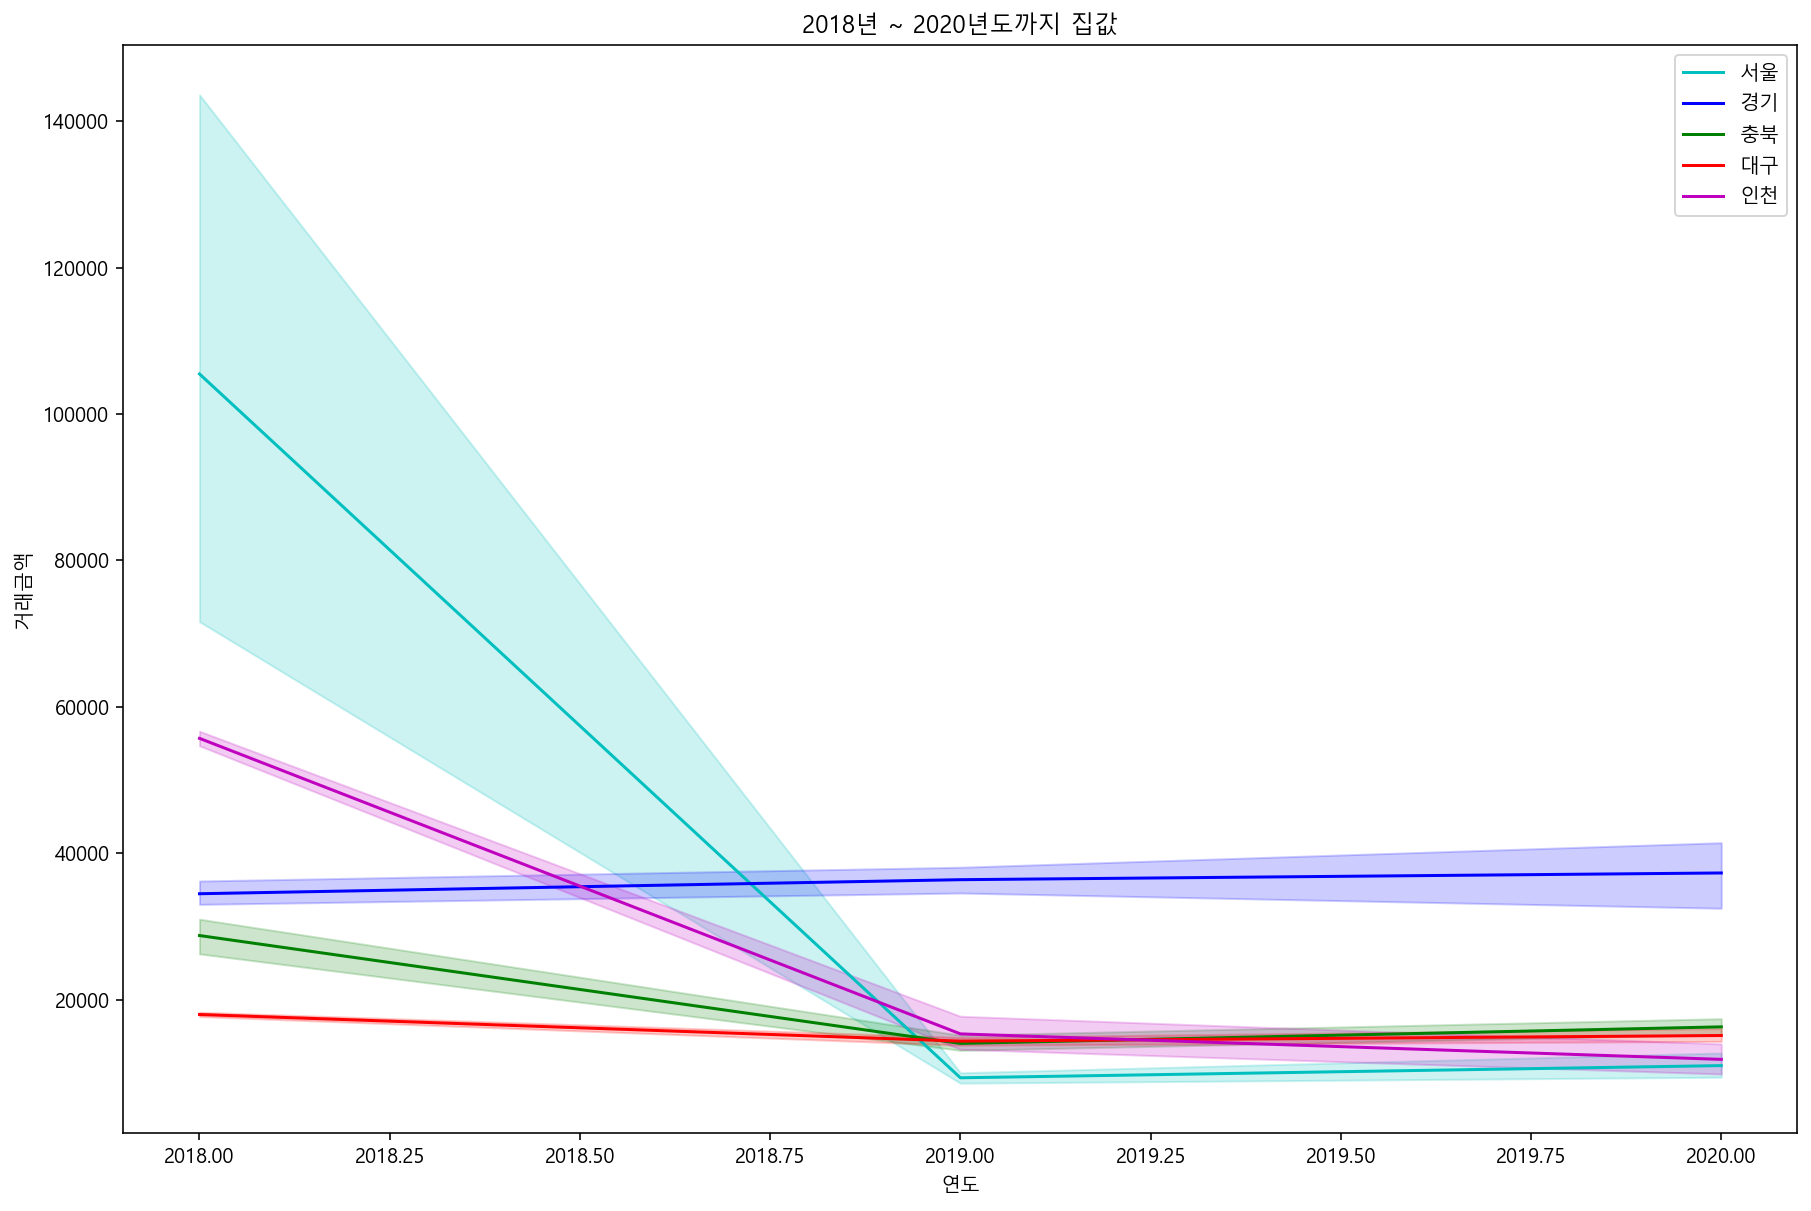

In [446]:
# 서울, 경기, 충북, 대구, 인천 지역의 2018년 ~ 2020년 까지의 거래금액 변화 추세 
plt.figure(figsize = (15,10))
ax  = sns.lineplot(x = 'year', y = 'mean', data = df_01, color = 'c'),
sns.lineplot(x = 'year', y = 'mean', data = df_02, color = 'b'),
sns.lineplot(x = 'year', y = 'mean', data = df_03, color = 'g'),
sns.lineplot(x = 'year', y = 'mean', data = df_04, color = 'r'),
sns.lineplot(x = 'year', y = 'mean', data = df_05, color = 'm')

plt.title("2018년 ~ 2020년도까지 집값")
plt.xlabel("연도")
plt.ylabel("거래금액")
plt.legend(labels=["서울","경기","충북","대구","인천"])
plt.show()